In [39]:
import warnings

# Ignorieren aller Warnungen
warnings.filterwarnings('ignore')

Datensatz aus einer Datenbank laden.

In [40]:
import pandas as pd
import sqlite3
conn = sqlite3.connect(r'C:\Users\Philipp\Desktop\python stuff\NYCTaxis.db') 

query = "SELECT * FROM NYCTaxis"  
df = pd.read_sql_query(query, conn)
conn.close()

Die ersten 11 Zeilen des Datensatzes anzeigen.

In [41]:
df.head(11)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


- id - Identifikationsnummer
- vendor_id = Händlernummer
- pickup_datetime - Datum der Abholung
- dropoff_datetime - Datum der Lieferung
- passenger_count - Passagierzahl
- pickup_longitude - Längengrad der Abholung
- pickup_latitude - Abholbreite
- dropoff_longitude - Dropoff-Längengrad
- dropoff_latitude - Dropoff-Breite
- store_and_fwd_flag - 
- trip_duration - Reisedauer


Ersten Überblick über die Daten im Datensatz verschaffen.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [43]:
round(df.describe(),2)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


In [58]:
short_duration_trips = df[df['trip_duration'] == 1.00]

display(short_duration_trips.head())

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
35196,id2536510,1,2016-04-17 11:44:49,2016-04-17 11:44:50,1,-73.940384,40.786423,-73.940300,40.786373,N,1,0.008973
207497,id1520236,1,2016-05-17 09:03:38,2016-05-17 09:03:39,1,-73.819893,40.740822,-73.819885,40.740822,N,1,0.000644
269418,id0553321,2,2016-04-11 19:01:35,2016-04-11 19:01:36,1,-73.945999,40.792202,-73.947411,40.792740,N,1,0.133260
279493,id1491861,1,2016-04-24 11:35:40,2016-04-24 11:35:41,1,-73.841423,40.695278,-73.841423,40.695274,N,1,0.000424
285635,id0075470,1,2016-03-07 16:12:28,2016-03-07 16:12:29,1,-73.980690,40.744419,-73.980690,40.744419,N,1,0.000000


Mögliche Ursachen für die niedrige Fahrtzeit könnte sein:

- Fehler beim erfassen der Daten
- Kurze Fahrten oder Stopps
- System- oder Datenfehler

Überprüfen ob es fehlender Werte im Datensatz gibt.

In [44]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Überprüfen ob es Duplikate im Datensatz gibt.

In [45]:
df.duplicated().sum()

0

Berechnen der Entfernung mit Hilfe der pickup_coords und der dropoff_coords.

In [46]:
def haversine_distance(row):
    pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup_coords, dropoff_coords).kilometers

df['distance'] = df.apply(haversine_distance, axis=1)


In [47]:
display(df[['pickup_datetime', 'dropoff_datetime', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'distance']].head())

,pickup_datetime,dropoff_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance
0,2016-03-14 17:24:55,2016-03-14 17:32:30,40.767937,-73.982155,40.765602,-73.964630,1.502172
1,2016-06-12 00:43:35,2016-06-12 00:54:38,40.738564,-73.980415,40.731152,-73.999481,1.808660
2,2016-01-19 11:35:24,2016-01-19 12:10:48,40.763939,-73.979027,40.710087,-74.005333,6.379687
3,2016-04-06 19:32:31,2016-04-06 19:39:40,40.719971,-74.010040,40.706718,-74.012268,1.483632
4,2016-03-26 13:30:55,2016-03-26 13:38:10,40.793209,-73.973053,40.782520,-73.972923,1.187038


Visualisierungen für verschiedene Interessante Punkte über den Datensatz.

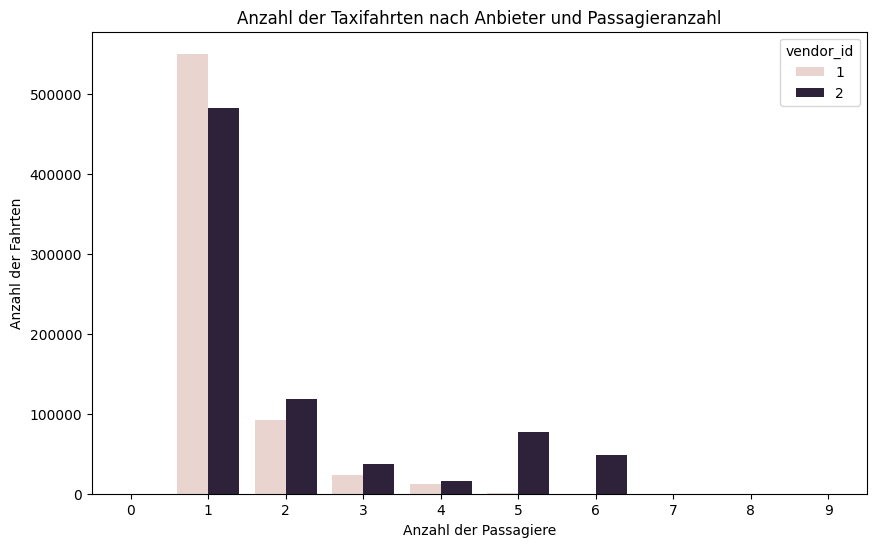

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import geodesic

passenger_counts = df.groupby(['vendor_id', 'passenger_count']).size().reset_index(name='trip_count')

plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='trip_count', hue='vendor_id', data=passenger_counts)
plt.title('Anzahl der Taxifahrten nach Anbieter und Passagieranzahl')
plt.xlabel('Anzahl der Passagiere')
plt.ylabel('Anzahl der Fahrten')
plt.show()

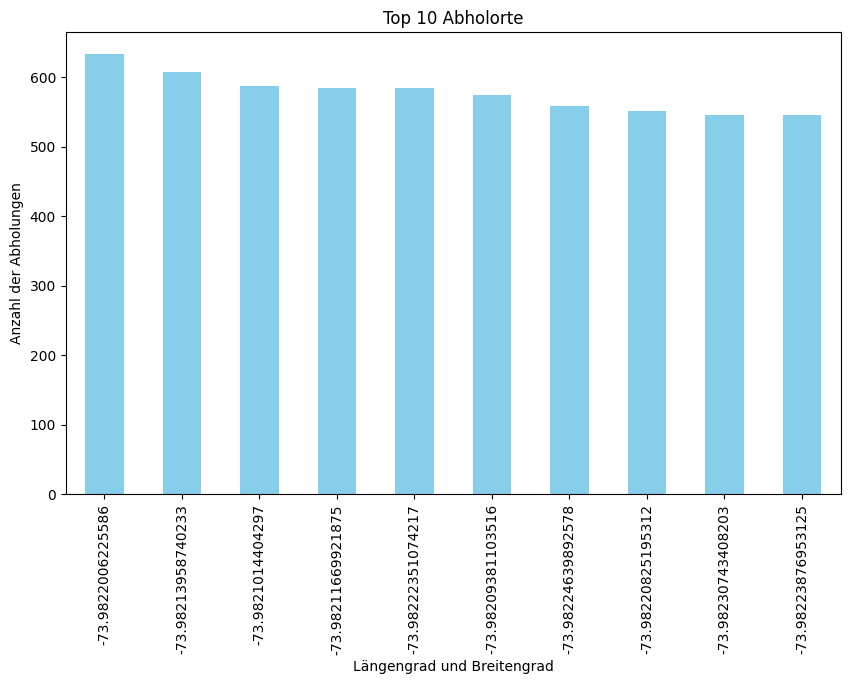

In [49]:
pickup_counts = df['pickup_longitude'].value_counts()

top_pickup_locations = pickup_counts.head(10)

plt.figure(figsize=(10, 6))
top_pickup_locations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Abholorte')
plt.xlabel('Längengrad und Breitengrad')
plt.ylabel('Anzahl der Abholungen')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


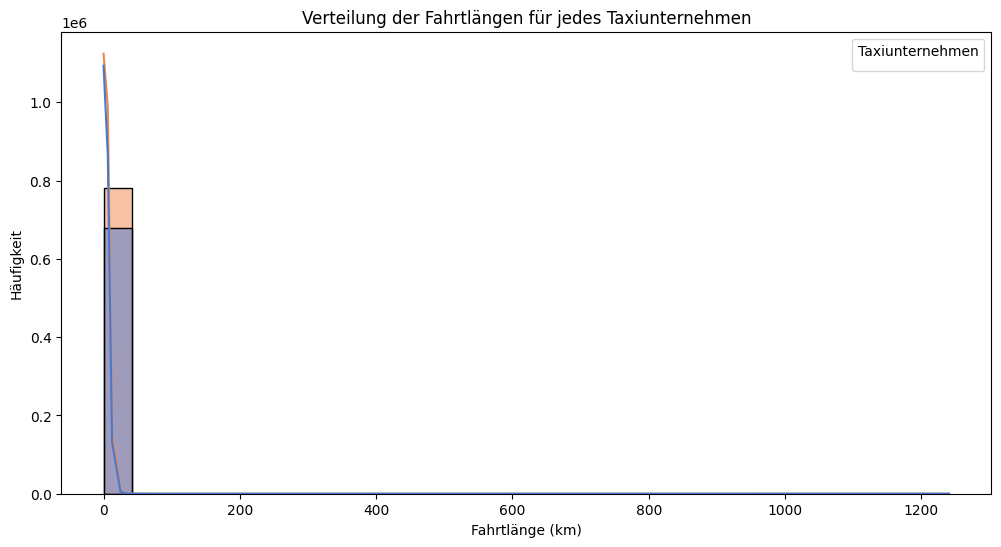

In [50]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='distance', hue='vendor_id', bins=30, kde=True, palette='muted')
plt.title('Verteilung der Fahrtlängen für jedes Taxiunternehmen')
plt.xlabel('Fahrtlänge (km)')
plt.ylabel('Häufigkeit')
plt.legend(title='Taxiunternehmen')
plt.show()

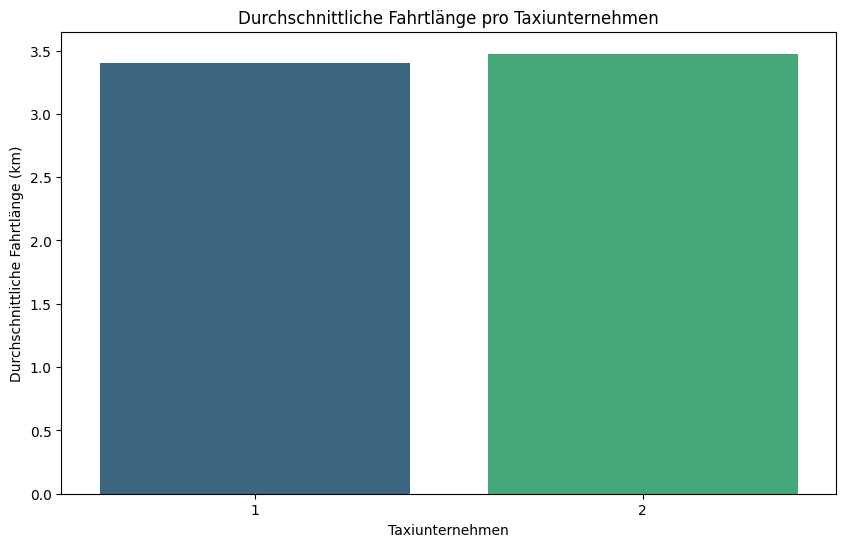

In [69]:
average_distance_per_vendor = df.groupby('vendor_id')['distance'].mean()

# Visualisiere den Durchschnitt der Fahrtlänge pro Taxiunternehmen
plt.figure(figsize=(10, 6))
sns.barplot(x=average_distance_per_vendor.index, y=average_distance_per_vendor.values, palette='viridis')
plt.title('Durchschnittliche Fahrtlänge pro Taxiunternehmen')
plt.xlabel('Taxiunternehmen')
plt.ylabel('Durchschnittliche Fahrtlänge (km)')
plt.show()

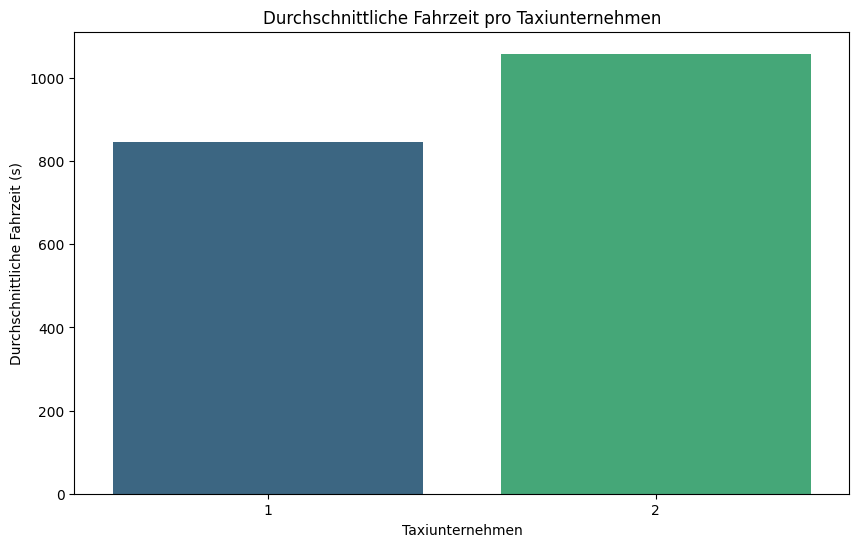

In [55]:
average_duration_per_vendor = df.groupby('vendor_id')['trip_duration'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_duration_per_vendor.index, y=average_duration_per_vendor.values, palette='viridis')
plt.title('Durchschnittliche Fahrzeit pro Taxiunternehmen')
plt.xlabel('Taxiunternehmen')
plt.ylabel('Durchschnittliche Fahrzeit (s)')
plt.show()

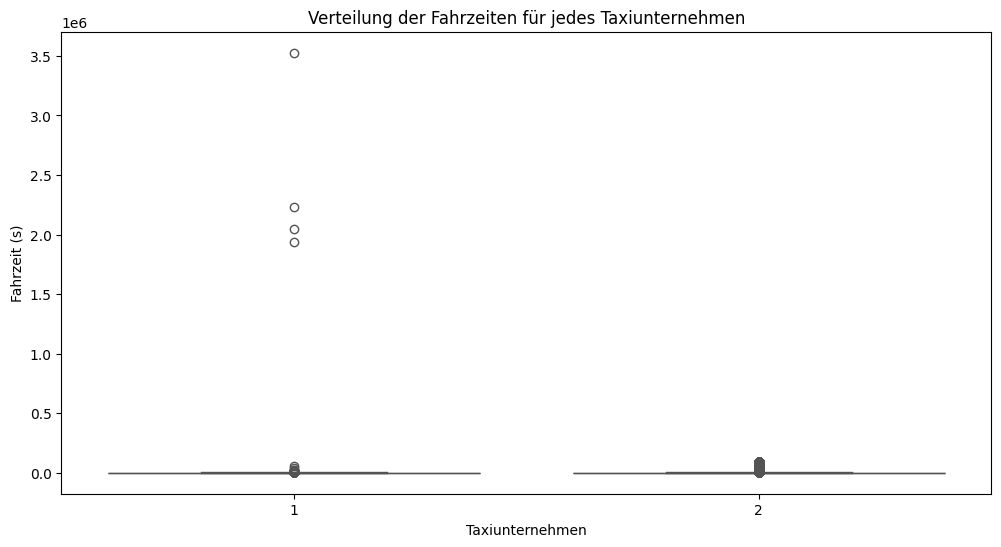

In [71]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='vendor_id', y='trip_duration', data=df, palette='muted')
plt.title('Verteilung der Fahrzeiten für jedes Taxiunternehmen')
plt.xlabel('Taxiunternehmen')
plt.ylabel('Fahrzeit (s)')
plt.show()

Text(0, 0.5, 'Fahrzeit (s)')

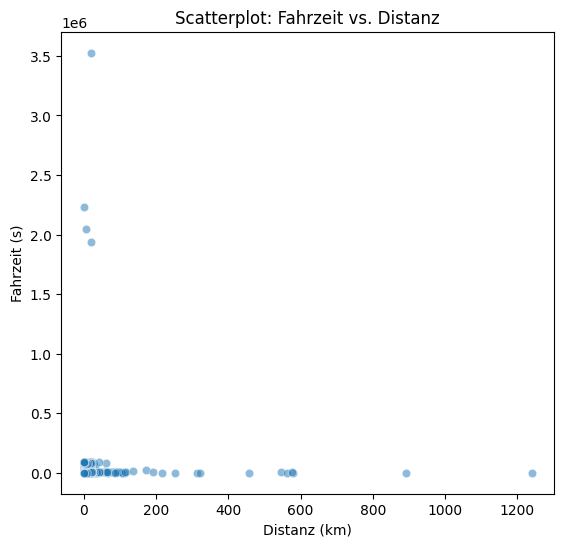

In [52]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.scatterplot(x='distance', y='trip_duration', data=df, alpha=0.5)
plt.title('Scatterplot: Fahrzeit vs. Distanz')
plt.xlabel('Distanz (km)')
plt.ylabel('Fahrzeit (s)')


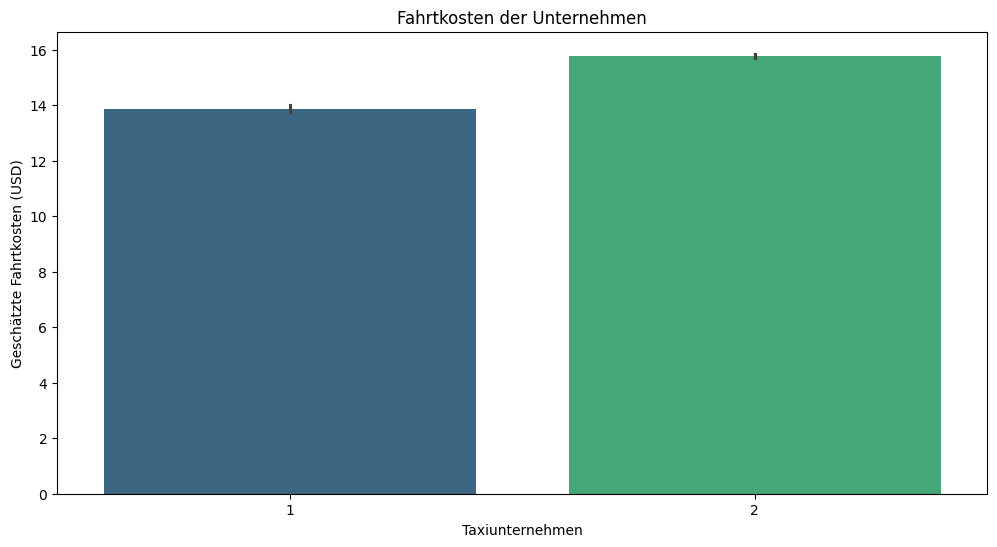

In [67]:
fare_estimate_distance = 2  
df['estimated_fare_distance'] = df['distance'] * fare_estimate_distance

fare_estimate_duration = 0.5 
df['estimated_fare_duration'] = df['trip_duration'] / 60 * fare_estimate_duration

df['total_estimated_fare'] = df['estimated_fare_distance'] + df['estimated_fare_duration']

plt.figure(figsize=(12, 6))
sns.barplot(x='vendor_id', y='total_estimated_fare', data=df, palette='viridis')
plt.title('Fahrtkosten der Unternehmen')
plt.xlabel('Taxiunternehmen')
plt.ylabel('Geschätzte Fahrtkosten (USD)')
plt.show()